In [7]:
%load_ext autoreload
%autoreload 2

In [2]:
from scripts.ar import *

/home/hugo/.pyenv/versions/3.10.4/envs/ctxeff/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/home/hugo/.pyenv/versions/3.10.4/envs/ctxeff/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/hugo/.pyenv/versions/3.10.4/envs/ctxeff/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Please install tensorboardX: pip install tensorboardX
[nltk_data] Downloading package punkt to /home/hugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading

In [3]:
name_map = {"transformer_encdec": "Transformer \n Encoder-Decoder",
            "llama": "Transformer++", 
            "retnet": "RetNet", 
            "mamba": "Mamba", 
            "mamba_mha": "Mamba-MHA", 
            "mamba_mistral": "Mamba-Local", 
            "mamba_encdec": "Mamba \n Encoder-Decoder"}

source, target = "ro", "en"
dataset = "wmt16"

ne_counter_path = f"mt/res/{dataset}/{dataset}-{source}-{target}-ne_counter.json"  
models = [
    "transformer_encdec",
    "llama",
    "retnet",
    "mamba",
    "mamba_mha",
    "mamba_mistral",
    "mamba_encdec",
]

ds = build_dataset(dataset, source, target, is_encoder_decoder=False)
models = [build_model(task="mt", name=model) for model in models]
# fix syntax error
model_names = [
    name_map[model.model_name] if model.model_name in name_map else model.model_name
    for model in models
]
model_names

['Transformer \n Encoder-Decoder',
 'Transformer++',
 'RetNet',
 'Mamba',
 'Mamba-MHA',
 'Mamba-Local',
 'Mamba \n Encoder-Decoder']

[nltk_data] Downloading package punkt to /home/hugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/hugo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


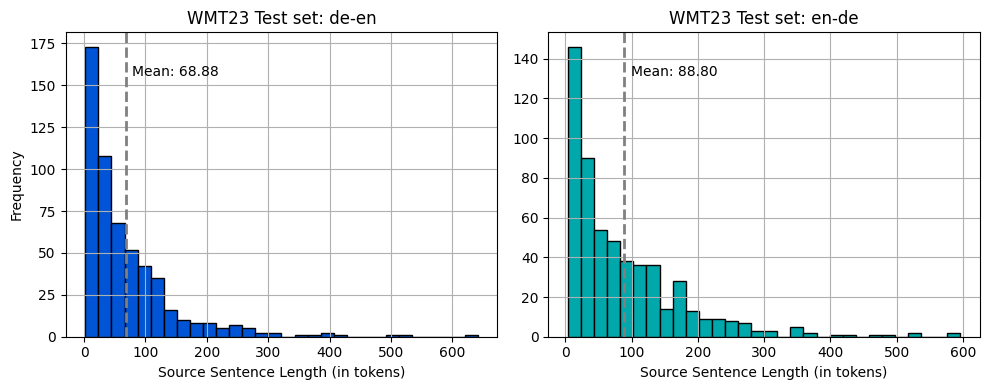

In [29]:
# template_samples = (
#     ds.dataset["test"][source_lang]
#     if source_lang == "de"
#     else ds.dataset[source_lang]
# )

import numpy as np
import matplotlib.pyplot as plt


def plot_language_pair_histogram(
    dataset_name, source_lang, target_lang, subplot_position, color_index
):
    # Build the dataset for the specified language pair
    ds = build_dataset(dataset_name, source_lang, target_lang, is_encoder_decoder=False)
    tok = ds.get_tokenizer()

    # Retrieve samples and tokenize
    template_samples = (
        ds.dataset["test"][source_lang]
        if source_lang == "de"
        else ds.dataset[source_lang]
    )
    tok_samples = tok.batch_encode_plus(template_samples)["input_ids"]
    lens = [len(sample) for sample in tok_samples]

    # Plotting the histogram of the sentence lengths
    ax = plt.subplot(1, 2, subplot_position)
    n, bins, patches = ax.hist(
        lens, bins=30, color=plt.cm.winter(color_index), edgecolor="black"
    )

    # Calculate and plot the mean sentence length
    mean_len = np.mean(lens)
    ax.axvline(mean_len, color="gray", linestyle="dashed", linewidth=2)
    ax.text(mean_len + 10, max(n) * 0.9, f"Mean: {mean_len:.2f}", color="black")

    plt.title(f"WMT23 Test set: {source_lang}-{target_lang}")
    plt.xlabel("Source Sentence Length (in tokens)")
    if subplot_position == 1:  # Only add y-label to the first subplot
        plt.ylabel("Frequency")
    plt.grid(True)


# Create a figure to hold the subplots
plt.figure(figsize=(10, 4)) 

# Plot the histogram for German to English using the first color from winter colormap
plot_language_pair_histogram("wmt23-5concat", "de", "en", 1, 0.33)  # mid-point color

# Plot the histogram for English to German using another color from winter colormap
plot_language_pair_histogram(
    "wmt23-en-de", "en", "de", 2, 0.66
)  # darker color from the colormap

# Display the plots
plt.tight_layout()
plt.savefig(f"plots/wmt23-histogram.png")
plt.show()

In [4]:
# dataset = "wmt23-5concat"
outputs = [get_gen_outputs(f"mt/res/{dataset}/{dataset}-{source}-{target}-{model.model_name}.json") for model in models]

In [5]:
ne_counter = get_ne_counter(ne_counter_path, ds) 
test_named_entities = get_test_ne(ds, source, target)

  0%|          | 0/1999 [00:00<?, ?it/s]

In [8]:
ne_accs = [
    get_ne_freq_accuracy(ne_counter, test_named_entities, outputs[i])
    for i in range(len(models))
]

In [10]:
import json 

json.dumps(ne_accs)

'[[[1.0, 268], [true, 126], [1.0, 1601], [true, 1414], [0.0, 1], [0.0, 0], [true, 0], [1.0, 0], [false, 0], [false, 0], [true, 30], [1.0, 0], [1.0, 0], [0.0, 0], [1.0, 0], [1.0, 0], [1.0, 0], [true, 9], [true, 0], [true, 4], [true, 0], [true, 6], [1.0, 0], [true, 0], [true, 0], [true, 0], [true, 0], [true, 6], [true, 0], [true, 0], [false, 0], [true, 30], [1.0, 1], [true, 0], [true, 0], [true, 779], [true, 0], [false, 0], [true, 0], [0.8, 0], [0.0, 5], [1.0, 0], [0.0, 76], [1.0, 0], [false, 0], [1.0, 0], [1.0, 34], [1.0, 1], [false, 0], [true, 0], [true, 0], [0.9090909090909091, 729], [true, 8], [1.0, 39], [true, 0], [true, 0], [true, 0], [true, 0], [true, 0], [true, 9], [true, 0], [true, 0], [1.0, 0], [1.0, 2], [true, 0], [true, 0], [1.0, 0], [1.0, 0], [1.0, 2], [1.0, 0], [true, 0], [0.75, 0], [true, 0], [true, 0], [true, 0], [true, 0], [true, 0], [true, 0], [1.0, 0], [1.0, 0], [true, 7], [true, 1], [true, 0], [true, 26], [1.0, 392], [true, 1], [true, 0], [true, 69], [1.0, 4915], [tru

[668, 251, 154]


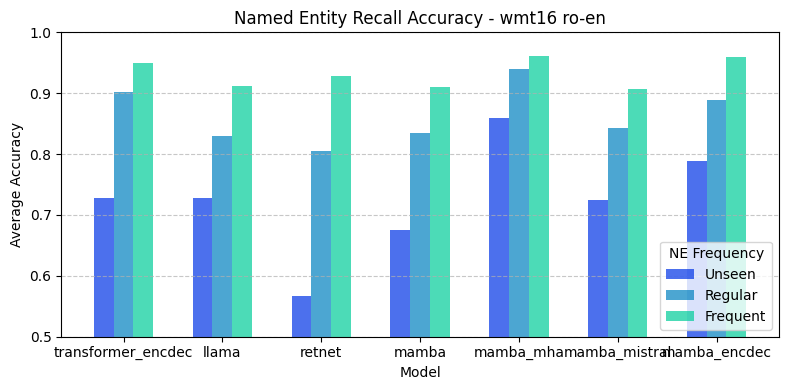

In [9]:
plot_ne_freqs_shifted_bars("wmt16", ne_accs, [model.model_name for model in models], source, target)

In [7]:
json.dumps(test_named_entities)

'[[0, []], [1, ["Ban", "Ki-moon"]], [2, []], [3, ["Ban", "China"]], [4, []], [5, ["Ban", "Iran"]], [6, []], [7, []], [8, []], [9, []], [10, ["Donald Trump"]], [11, ["Donald Trump"]], [12, []], [13, ["Trump"]], [14, ["Herman Cain", "Rick Perry"]], [15, []], [16, ["Super PAC", "Trump", "Growth", "Club", "Jeb Bush"]], [17, []], [18, ["Trump"]], [19, ["Donald Trump"]], [20, []], [21, []], [22, ["Donald Trump"]], [23, []], [24, []], [25, ["Iowa", "Trump", "Quinnipiac"]], [26, ["Trump", "GOP"]], [27, ["Trump", "CNN/ORC"]], [28, []], [29, ["Ben Carson", "Trump"]], [30, []], [31, ["Marco", "Rubio"]], [32, ["Jeb Bush"]], [33, ["Trump"]], [34, ["ABC", "News/Washington", "Post", "Donald Trump"]], [35, ["Iowa", "Quinnipiac"]], [36, ["ABC/Post"]], [37, []], [38, ["Trump"]], [39, ["Trump", "CNN/ORC", "GOP"]], [40, ["Jeb Bush"]], [41, ["GOP"]], [42, ["Mitt Romney", "Rick Perry"]], [43, ["Trump", "GOP"]], [44, ["Trump"]], [45, ["Trump"]], [46, ["Trump"]], [47, ["John Kasich", "Chris Christie", "Fiorin

  0%|          | 0/549 [00:00<?, ?it/s]

[171, 136, 267]


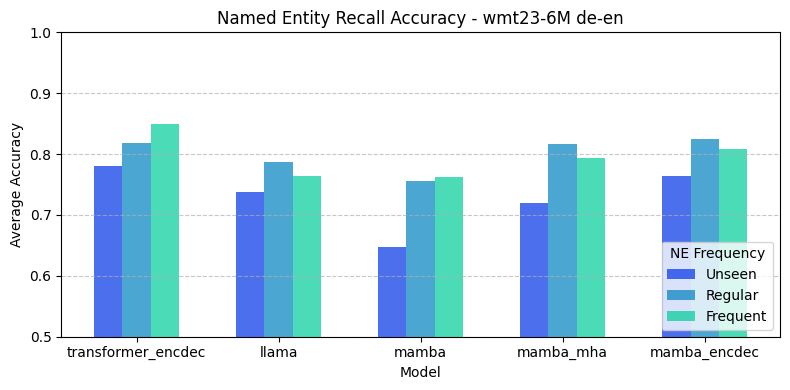

[171, 136, 267]


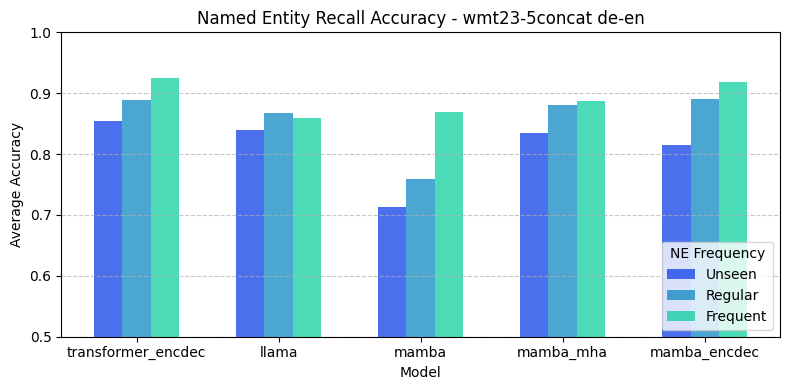

[171, 136, 267]


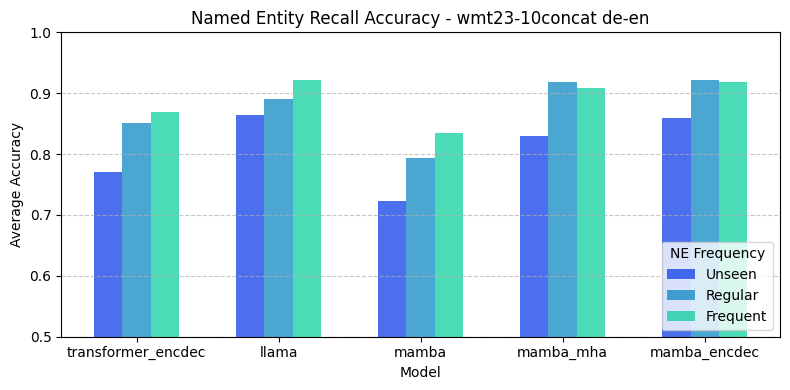

In [6]:
models = [
    "transformer_encdec",
    "llama",
    "mamba",
    "mamba_mha",
    "mamba_encdec",
]

source, target = "de", "en"

test_named_entities = get_test_ne(
    build_dataset("wmt23-6M", source, target, is_encoder_decoder=False), 
    source,
    target,
)
ne_counter_path = "mt/res/wmt23-6M/wmt23-6M-de-en-ne_counter.json"
ne_counter = get_ne_counter(ne_counter_path, ds) 


# test_named_entities = get_test_ne("wmt23-6M", source, target)
for dataset in ("wmt23-6M", "wmt23-5concat", "wmt23-10concat"):
    outputs = [
        get_gen_outputs(
            f"mt/res/{dataset}/{dataset}-{source}-{target}-{model}.json"
        )
        for model in models 
    ]
    ne_accs = [
        get_ne_freq_accuracy(ne_counter, test_named_entities, outputs[i])
        for i in range(len(models))
    ]
    plot_ne_freqs_shifted_bars(dataset, ne_accs, models, "de", "en")

In [ ]:
plot_scatterplots(dataset,ne_accs, [model.model_name for model in models], source, target)

In [10]:
len(ne_accs), len(model_names)

(5, 5)

In [11]:
max(max(count for _, count in model_accs) for model_accs in ne_accs)

71444

In [15]:
models

[models.transformer.encdec_mt.TransformerEncDecMT,
 models.transformer.llama_mt.LlamaMT,
 models.retnet.mt_wrapper.RetNetMT,
 models.mamba.mt_wrapper.MambaMT,
 models.hybrids.mamba_mistral.HybridMistralMamba,
 models.hybrids.zero_mamba.HybridAttMamba,
 models.hybrids.mamba_encdec.MambaEncDec]

  0%|          | 0/8079 [00:00<?, ?it/s]

[402, 358, 175]


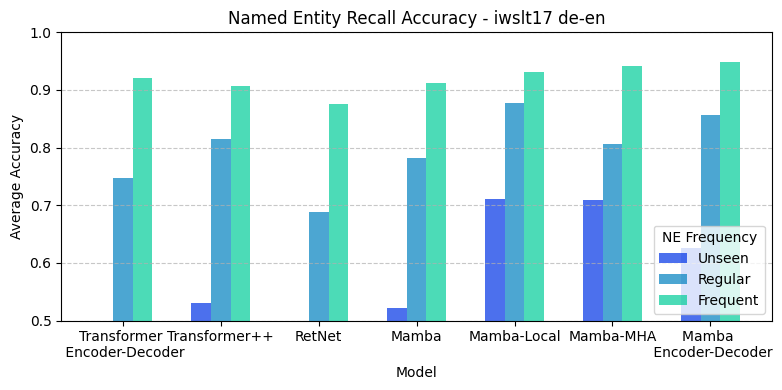

  0%|          | 0/1999 [00:00<?, ?it/s]

[668, 251, 154]


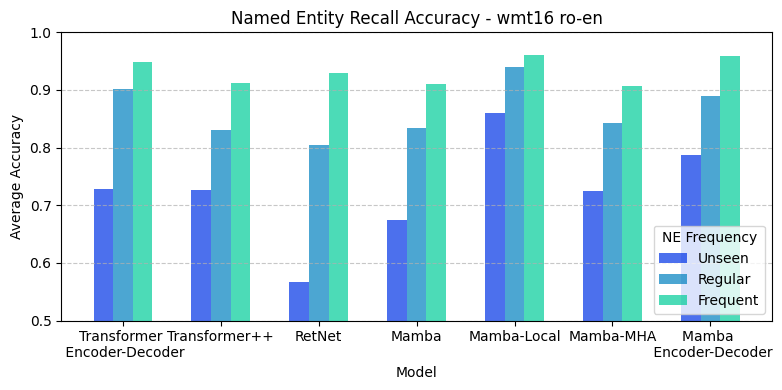

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/3003 [00:00<?, ?it/s]

[671, 342, 567]


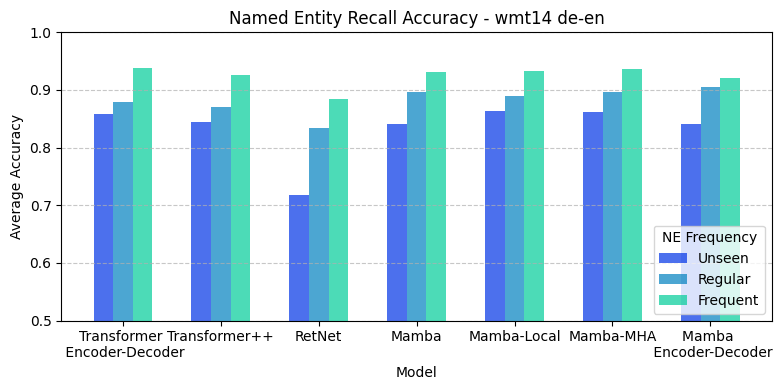

In [13]:
lp = {"iwslt17": ("de", "en"), "wmt16": ("ro", "en"), "wmt14": ("de", "en")}


models = [
    "transformer_encdec",
    "llama",
    "retnet",
    "mamba",
    "mamba_mha",
    "mamba_mistral",
    "mamba_encdec",
]

for dataset in ("iwslt17", "wmt16", "wmt14"):
    source, target = lp[dataset]
    ds = build_dataset(dataset, source, target, is_encoder_decoder=False)
    test_named_entities = get_test_ne(ds, source, target)
    outputs = [
        get_gen_outputs(f"mt/res/{dataset}/{dataset}-{source}-{target}-{model}.json")
        for model in models
    ]
    ne_counter_path = f"mt/res/{dataset}/{dataset}-{source}-{target}-ne_counter.json"
    ne_counter = get_ne_counter(ne_counter_path, ds)
    ne_accs = [
        get_ne_freq_accuracy(ne_counter, test_named_entities, outputs[i])
        for i in range(len(models))
    ]
    plot_ne_freqs_shifted_bars(dataset, ne_accs, model_names, source, target)

In [ ]:
plot_ne_freqs_line(dataset, ne_accs, model_names, "de", "en")

In [12]:
lens_accs = [get_ne_len_accuracy(test_named_entities, outputs[i], ds, source, target) for i in range(len(models))]

[nltk_data] Downloading package punkt to /home/hugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/hugo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[13, 16, 32, 15, 8, 7]


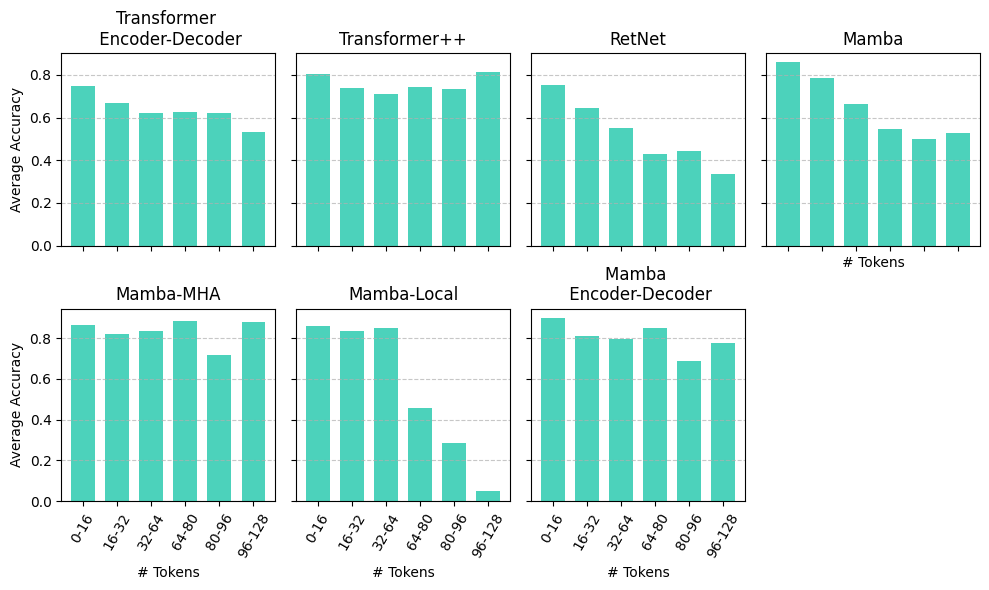

In [15]:
plot_ne_lens(dataset, lens_accs, model_names, source, target)

In [4]:
bleu_scores = [
    get_bleu_scores_by_length(outputs[i], ds, source, target)
    for i in range(len(models))
]

[nltk_data] Downloading package punkt to /home/hugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/hugo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[13, 16, 16, 16, 16, 12, 9]


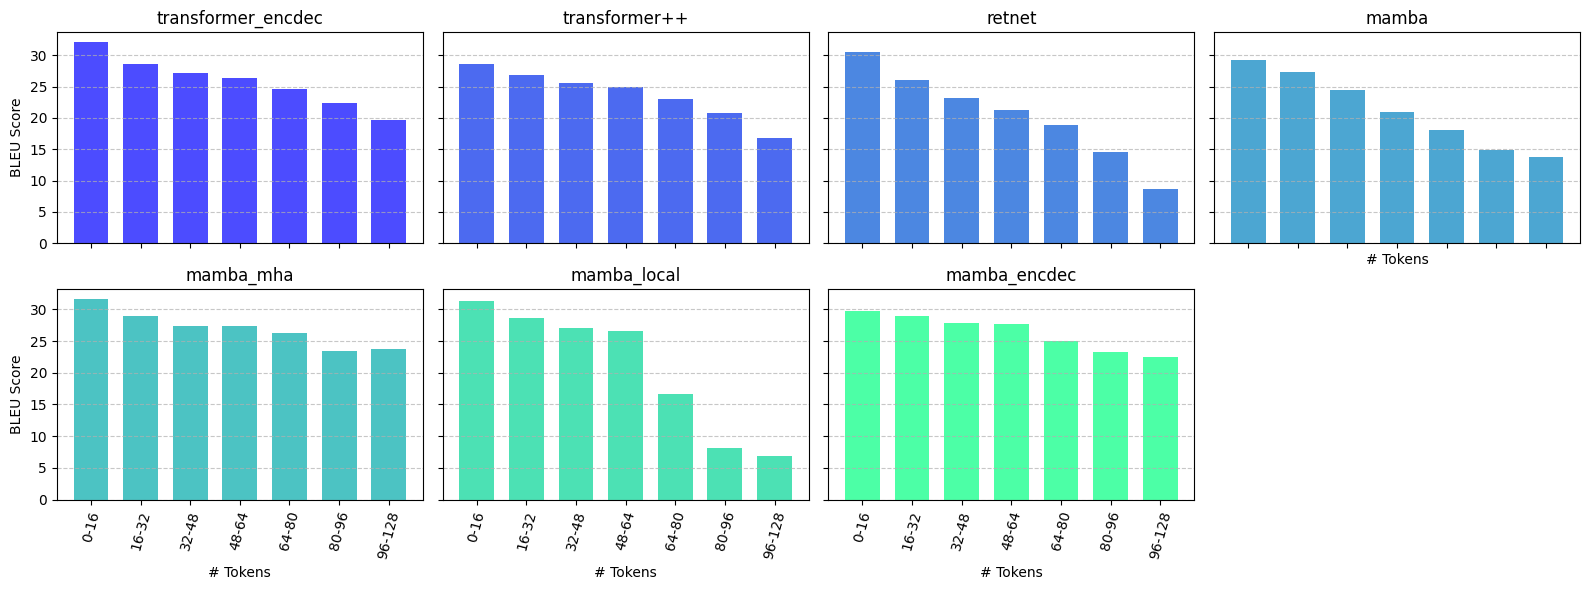

In [74]:
plot_bleu_lens(
    dataset, bleu_scores, model_names, source, target
)

[nltk_data] Downloading package punkt to /home/hugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/hugo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


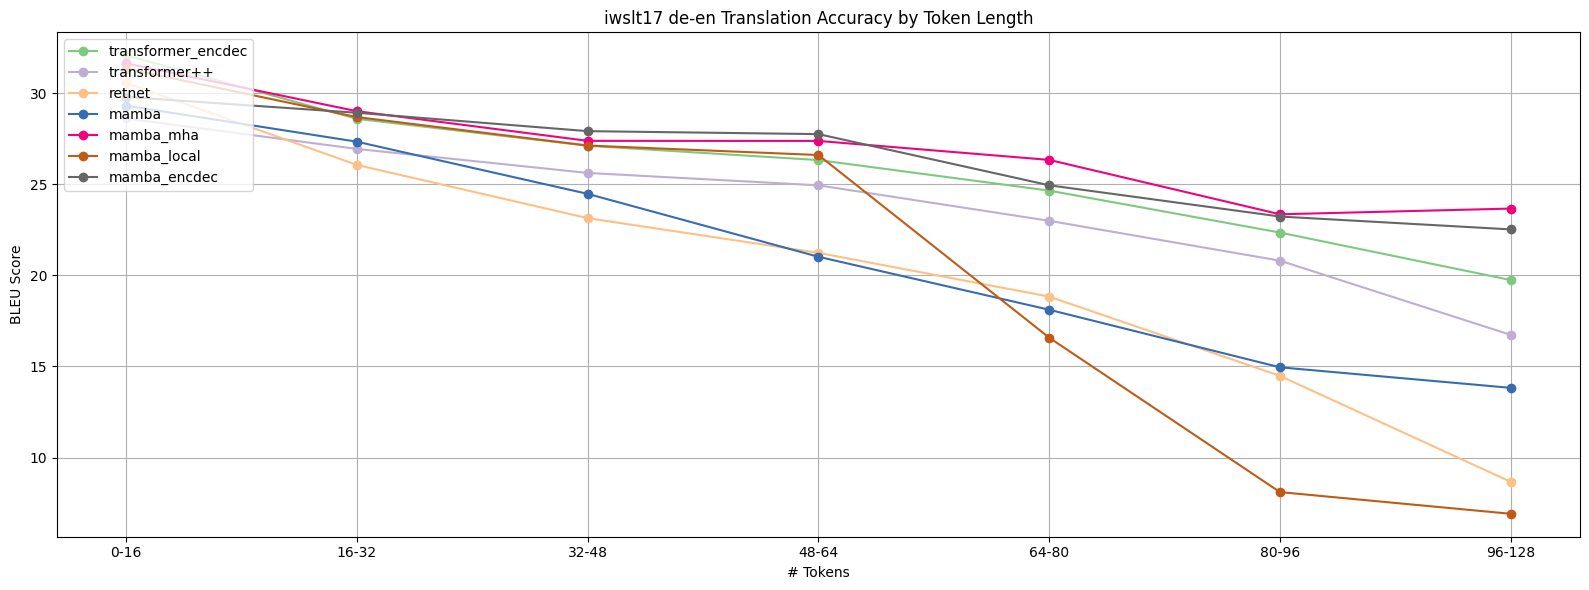

In [8]:
plot_bleu_lens_line(dataset, bleu_scores, model_names, source, target)

In [16]:
comet_scores = [
    get_comet_scores_by_length(outputs[i], ds, source, target)
    for i in range(len(models))
]

In [30]:
dataset, model_names

('wmt14',
 ['Transformer \n Encoder-Decoder',
  'Transformer++',
  'RetNet',
  'Mamba',
  'Mamba-Local',
  'Mamba-MHA',
  'Mamba \n Encoder-Decoder'])

[13, 16, 32, 37, 2]


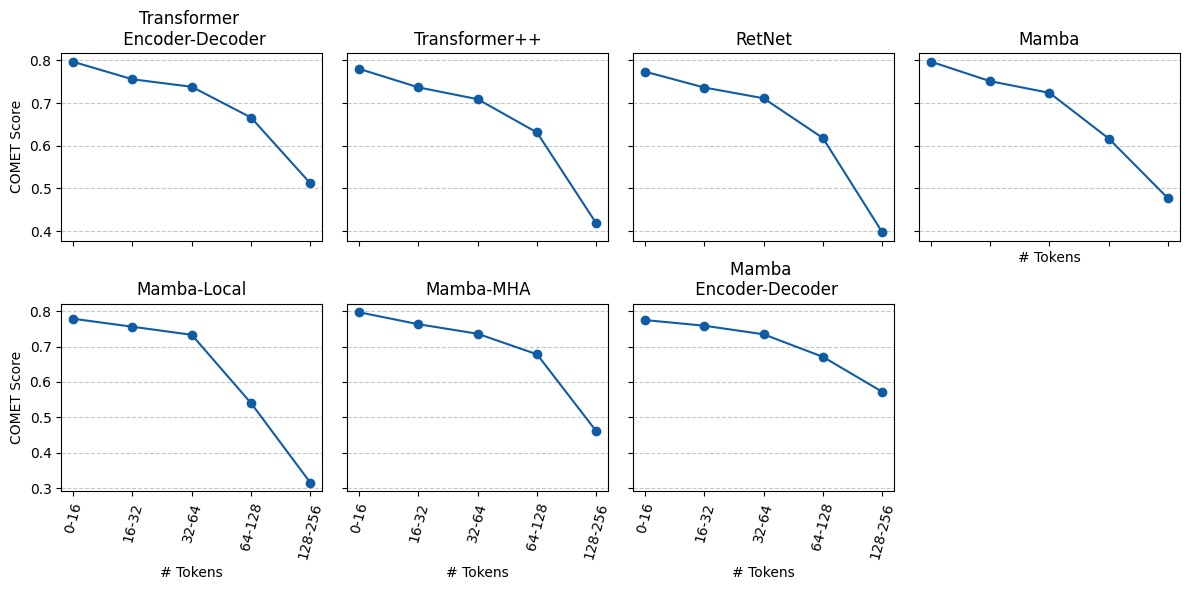

In [29]:
plot_comet_lens(dataset, comet_scores, model_names, source, target)

In [1]:
from scripts.ar import *

name_map = {
    "transformer_encdec": "Transformer \n Encoder-Decoder",
    "llama": "Transformer++",
    "retnet": "RetNet",
    "mamba": "Mamba",
    "mamba_mha": "Mamba-MHA",
    "mamba_mistral": "Mamba-Local",
    "mamba_encdec": "Mamba \n Encoder-Decoder",
}


def get_comet_scores_by_length(gen_outputs, ds, source, target):
    # Dictionary to store the accumulated COMET scores and counts for each token length
    comet_scores = []
    tokenizer = ds.get_tokenizer()

    for sample_idx in range(len(ds.dataset)):
        src = (
            ds.dataset[sample_idx]["translation"][source]
            if "translation" in ds.dataset[sample_idx]
            else ds.dataset[sample_idx][source]
        )
        # ref = ds.dataset["test"][sample_idx]["translation"][target]
        comet = gen_outputs[sample_idx][1][4]

        # Tokenize the source sentence to get the number of tokens
        n_tokens = len(tokenizer(src)["input_ids"])

        comet_scores.append((comet, n_tokens))


    return comet_scores


source, target = "de", "en"
datasets = ["6M", "5concat", "10concat"] 
# datasets = ["wmt23-6M", "wmt23-5concat"]
models = ["transformer_encdec", "llama", "mamba", "mamba_mha", "mamba_encdec"]
# models = [ "llama", "mamba", "mamba_mha", "mamba_encdec"]

# Prepare data for all models and datasets for both BLEU and COMET metrics
all_data_bleu = {}
all_data_comet = {}
models_built = [build_model(task="mt", name=model) for model in models]
for dataset in datasets:
    ds = build_dataset("ted-talks", source, target, is_encoder_decoder=False)
    outputs = [
        get_gen_outputs(
            f"mt/res/ted-talks/ted-talks-{source}-{target}-{model.model_name}-{dataset}.json",
        ) for model in models_built
    ]

    # bleu_scores = [
    #    get_bleu_scores_by_length(output, ds, source, target) for output in outputs
    # ]
    comet_scores = [
        get_comet_scores_by_length(output, ds, source, target) for output in outputs
    ]
    # all_data_bleu[dataset] = bleu_scores
    all_data_comet[dataset] = comet_scores

# Extract model names assuming model instances have an attribute `model_name`

model_names = [
    name_map[model.model_name] if model.model_name in name_map else model.model_name
    for model in models_built
]

/home/hugo/.pyenv/versions/3.10.4/envs/ctxeff/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/home/hugo/.pyenv/versions/3.10.4/envs/ctxeff/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/hugo/.pyenv/versions/3.10.4/envs/ctxeff/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Please install tensorboardX: pip install tensorboardX
[nltk_data] Downloading package punkt to /home/hugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading

/tmp/ipykernel_3743788/3600189522.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("winter", 3)  # 'n' is the nu|mber of unique colors needed


[30, 29, 31, 29, 28, 14, 19]


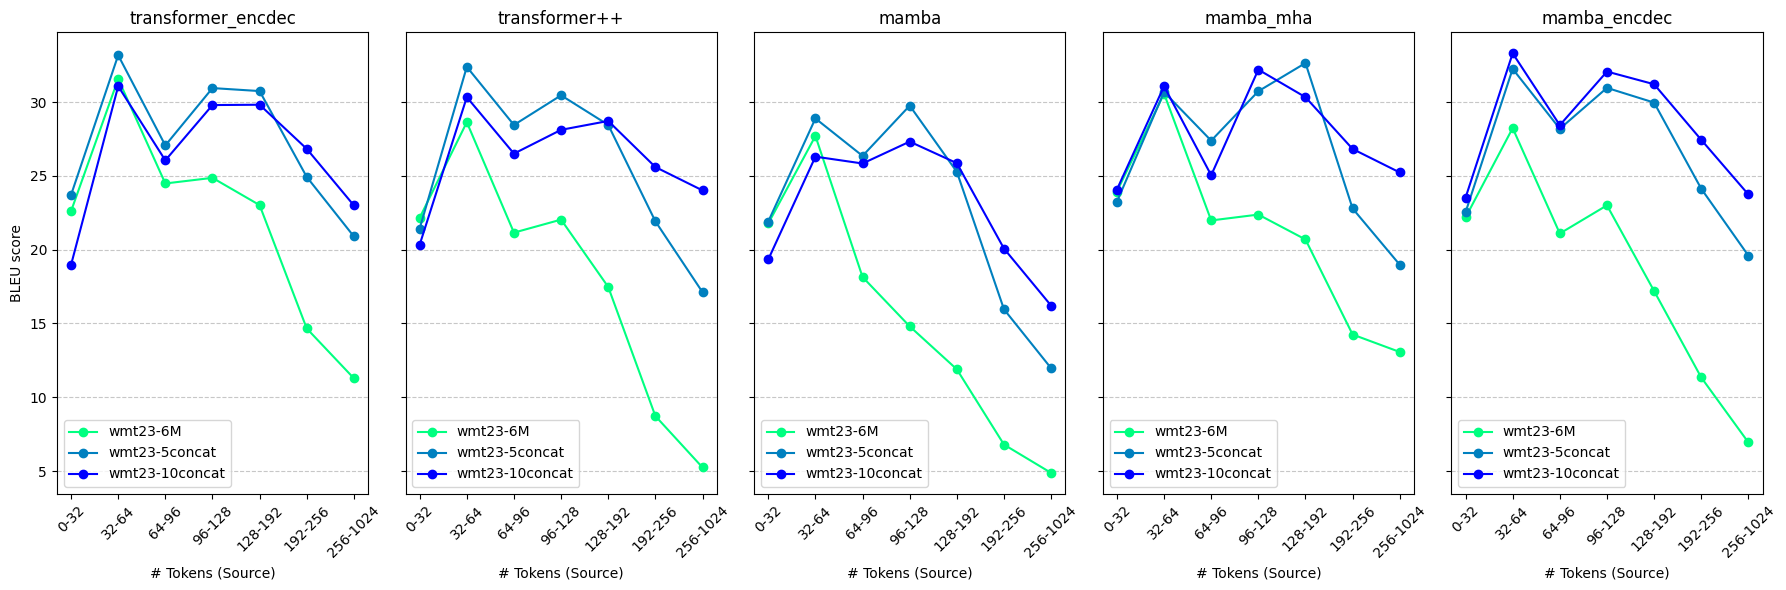

In [6]:
def plot_bleu_lens(datasets, all_data, model_names, source, target):
    n = len(model_names)

    cmap = plt.cm.get_cmap("winter", 3)  # 'n' is the nu|mber of unique colors needed
    colors = [cmap(i) for i in range(2,-1, -1)]
    
    # colors = [cmap(i) for i in range(n)]
    # print(colors)
    
    bins = [0, 32, 64, 96, 128, 192, 256, 1024]
    # bins = [1, 25, 50, 75, 100, 125, 150, 250, 750]
    bucket_labels = [f"{int(bins[i-1])}-{int(bins[i])}" for i in range(1, len(bins))]

    ncols = 3  # Max number of columns
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(1, 5, figsize=(18, 6), sharey=True)
    axes = np.array(axes).reshape(-1)  # Flatten the axes array for easy indexing

    for i, (ax, model_name) in enumerate(zip(axes, model_names)):
        for dataset, bleu_scores in all_data.items():
            model_data = bleu_scores[i]
            binned_accuracies = [[] for _ in range(len(bins) - 1)]
            for accuracy, count in model_data:
                bucket_index = np.digitize(count, bins) - 1
                if bucket_index < len(binned_accuracies):
                    binned_accuracies[bucket_index].append(accuracy)
            mean_accuracies = [
                np.mean(bucket) if bucket else 0 for bucket in binned_accuracies
            ]
            ax.plot(
                bucket_labels,
                mean_accuracies,
                label=f"{dataset}",
                color=colors[datasets.index(dataset)],
                marker="o",
            )
        ax.set_title(model_name)
        if i == 0:  # Set y-label only on the first column
            ax.set_ylabel("BLEU score")
        ax.set_xlabel("# Tokens (Source)")
        ax.tick_params(axis="x", rotation=45)
        ax.grid(axis="y", linestyle="--", alpha=0.7)
        ax.legend()

    print([len(bucket) for bucket in binned_accuracies])

    plt.tight_layout()
    plt.savefig(f"plots/{source}-{target}-overlap-bleu_lens.png")
    plt.show()

plot_bleu_lens(datasets, all_data_bleu, model_names, source, target)

/tmp/ipykernel_3240041/2612946799.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("winter", 3)  # 'n' is the number of unique colors needed


[36, 59, 107, 208, 403, 635, 486, 171, 62, 62, 15, 3]


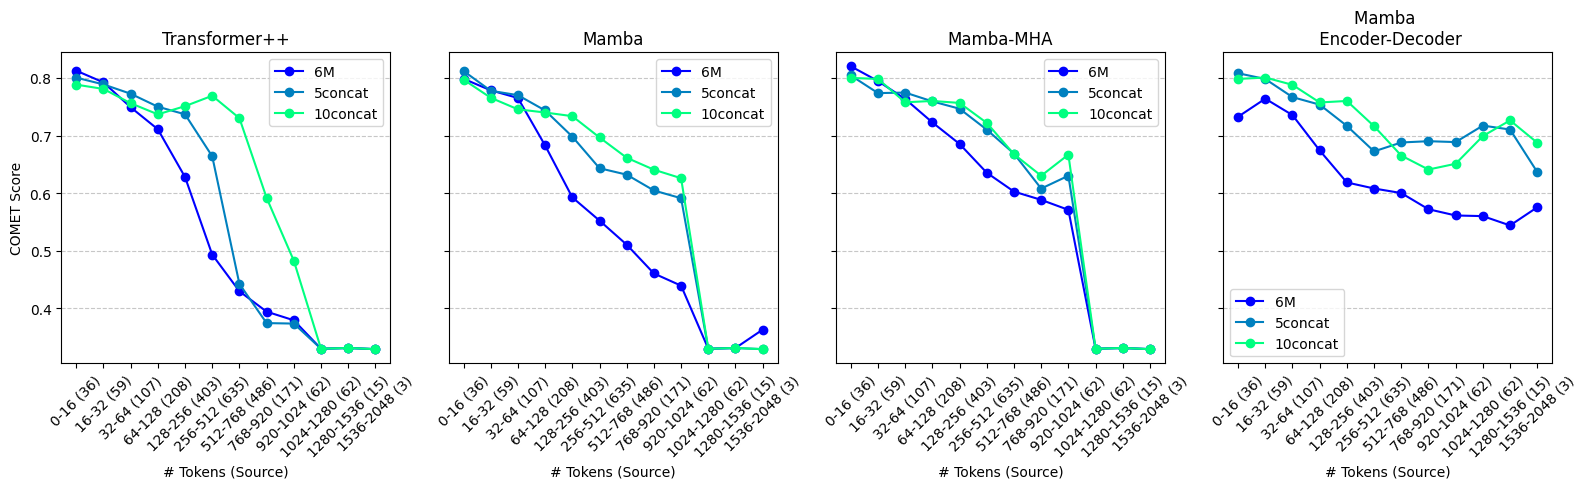

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def plot_comet_lens(datasets, all_data, model_names, source, target):
    cmap = plt.cm.get_cmap("winter", 3)  # 'n' is the number of unique colors needed
    colors = [to_hex(cmap(i)) for i in range(3)]

    bins = [0, 16,  32, 64, 128, 256, 512, 768, 920, 1024, 1280, 1536, 2048]
    bucket_labels = [f"{int(bins[i-1])}-{int(bins[i])}" for i in range(1, len(bins))]

    ncols = 3  # Max number of columns
    fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)
    axes = np.array(axes).reshape(-1)  # Flatten the axes array for easy indexing

    for i, (ax, model_name) in enumerate(zip(axes, model_names)):
        for dataset, comet_scores in all_data.items():
            model_data = comet_scores[i]
            binned_accuracies = [[] for _ in range(len(bins) - 1)]
            binned_counts = [0] * (
                len(bins) - 1
            )  # List to store the count of samples in each bin

            for accuracy, count in model_data:
                bucket_index = np.digitize(count, bins) - 1
                if bucket_index < len(binned_accuracies):
                    binned_accuracies[bucket_index].append(accuracy)
                    binned_counts[bucket_index] += 1  # Increment the count for the bin

            mean_accuracies = [
                np.mean(bucket) if bucket else 0 for bucket in binned_accuracies
            ]

            # Update bucket_labels to include the count of samples
            bucket_labels_with_counts = [
                f"{label} ({binned_counts[j]})" 
                for j, label in enumerate(bucket_labels)
            ]

            ax.plot(
                bucket_labels_with_counts,
                mean_accuracies,
                label=f"{dataset}",
                color=colors[datasets.index(dataset)],
                marker="o",
            )
        ax.set_title(model_name)
        ax.set_xlabel("# Tokens (Source)")
        if i == 0:  # Set y-label only on the first column
            ax.set_ylabel("COMET Score")
        ax.tick_params(axis="x", rotation=45)
        ax.grid(axis="y", linestyle="--", alpha=0.7)
        ax.legend()

    print([len(acc) for acc in binned_accuracies])

    plt.tight_layout()
    plt.savefig(f"plots/ted-talks-comet_lens.pdf")
    plt.show()

plot_comet_lens(datasets, all_data_comet, model_names, source, target)

[36, 59, 107, 208, 403, 635, 486, 233, 62, 15, 3]
Saving to: plots/tedtalks-deen_comet_len_sensivity.pdf


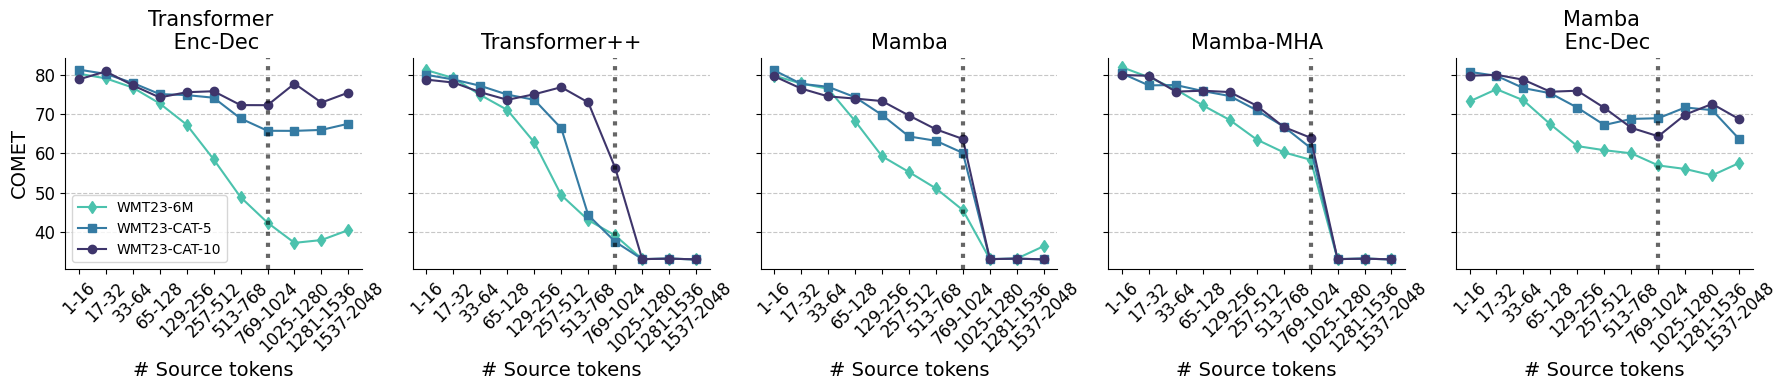

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 15

# sns.set_palette("colorblind")
# colors = sns.color_palette("colorblind", n_colors=3).as_hex()
colors = sns.color_palette("mako", n_colors=3).as_hex()[::-1]
# colors = sns.color_palette("rocket", n_colors=3).as_hex()[::-1]
# colors = sns.color_palette("ch:start=.7,rot=-.3", n_colors=3).as_hex()


def plot_comet_lens(datasets, all_data, model_names, source, target):
    global colors
    bins = [0, 16, 32, 64, 128, 256, 512, 768, 1024, 1280, 1536, 2048]
    bucket_labels = [f"{int(bins[i-1])+1}-{int(bins[i])}" for i in range(1, len(bins))]

    ncols = 3  # Max number of columns
    fig, axes = plt.subplots(1, 5, figsize=(18, 4), sharey=True) 
    axes = np.array(axes).reshape(-1)  # Flatten the axes array for easy indexing
    markers = ["d", "s", "o"]

    # Vertical lines positions for each dataset
    # vertical_lines = [58.4, 171.3, 312.4]

    for i, (ax, model_name) in enumerate(zip(axes, model_names)):
        for dataset, comet_scores in all_data.items():
            model_data = comet_scores[i]
            binned_accuracies = [[] for _ in range(len(bins) - 1)]
            binned_counts = [0] * (
                len(bins) - 1
            )  # List to store the count of samples in each bin

            for accuracy, count in model_data:
                bucket_index = np.digitize(count, bins) - 1
                if bucket_index < len(binned_accuracies):
                    binned_accuracies[bucket_index].append(accuracy)
                    binned_counts[bucket_index] += 1  # Increment the count for the bin

            mean_accuracies = [
                np.mean(bucket) if bucket else 0 for bucket in binned_accuracies
            ]

            mean_accuracies = [mean_accuracies* 100 for mean_accuracies in mean_accuracies]

            dataset_map = {
                "6M": "WMT23-6M",
                "5concat": "WMT23-CAT-5",
                "10concat": "WMT23-CAT-10",
            }
            ax.plot(
                bucket_labels,
                mean_accuracies,
                label=f"{dataset_map[dataset]}",
                color=colors[datasets.index(dataset)],
                marker=markers[datasets.index(dataset)],
            )

            # Add vertical dashed lines
            # for vi, line_pos in enumerate(vertical_lines):
            #     if line_pos <= bins[-1]:
            #         ax.axvline(x=np.digitize(line_pos, bins) - 1, color=colors[vi], linestyle='--', linewidth=1.0)

        ax.set_title(model_name, fontsize=LARGE_SIZE)
        ax.set_xlabel("# Source tokens", fontsize=MEDIUM_SIZE)
        if i == 0:  # Set y-label only on the first column
            ax.set_ylabel("COMET", fontsize=MEDIUM_SIZE)
            ax.legend(fontsize=SMALL_SIZE - 2)
        ax.tick_params(axis="x", rotation=45, labelsize=SMALL_SIZE)
        ax.tick_params(axis="y", labelsize=SMALL_SIZE)
        ax.grid(axis="y", linestyle="--", alpha=0.7)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        # Set the number of y-ticks
        num_yticks = 6
        ax.yaxis.set_major_locator(plt.MaxNLocator(num_yticks))
        ax.axvline(
            x=bucket_labels.index("769-1024"),
            linestyle=":",
            linewidth=3,
            color="black",
            alpha=0.6,
        )

    print([len(acc) for acc in binned_accuracies])

    plt.tight_layout()
    filename = f"plots/tedtalks-deen_comet_len_sensivity.pdf"
    print("Saving to:", filename)
    plt.savefig(filename, format="pdf", bbox_inches="tight", dpi=300)

    plt.show()


model_names = [
    "Transformer \n Enc-Dec",
    "Transformer++",
    "Mamba",
    "Mamba-MHA",
    "Mamba \n Enc-Dec",
]
source, target = "de", "en"

plot_comet_lens(datasets, all_data_comet, model_names, source, target)

[75, 114, 101, 125, 113, 29]
Saving to: plots/ende_comet_len_sensivity.pdf


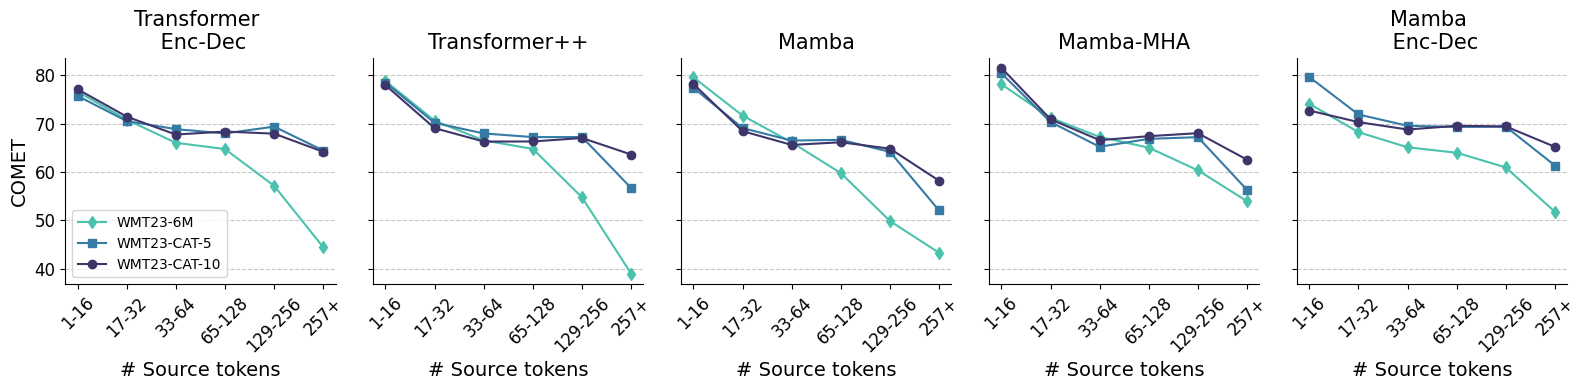

In [6]:
from scripts.ar import *

name_map = {
    "transformer_encdec": "Transformer \n Encoder-Decoder",
    "llama": "Transformer++",
    "retnet": "RetNet",
    "mamba": "Mamba",
    "mamba_mha": "Mamba-MHA",
    "mamba_mistral": "Mamba-Local",
    "mamba_encdec": "Mamba \n Encoder-Decoder",
}


def get_comet_scores_by_length(gen_outputs, ds, source, target):
    # Dictionary to store the accumulated COMET scores and counts for each token length
    comet_scores = []
    tokenizer = ds.get_tokenizer()

    for sample_idx in range(len(ds.dataset)):
        src = (
            ds.dataset[sample_idx]["translation"][source]
            if "translation" in ds.dataset[sample_idx]
            else ds.dataset[sample_idx][source]
        )
        # ref = ds.dataset["test"][sample_idx]["translation"][target]
        comet = gen_outputs[sample_idx][1][4]

        # Tokenize the source sentence to get the number of tokens
        n_tokens = len(tokenizer(src)["input_ids"])

        comet_scores.append((comet, n_tokens))

    return comet_scores


source, target = "en", "de"
datasets = ["6M", "5concat", "10concat"]  
# datasets = ["wmt23-6M", "wmt23-5concat"]
models = ["transformer_encdec", "llama", "mamba", "mamba_mha", "mamba_encdec"]
# models = ["mamba", "mamba_encdec"]

# Prepare data for all models and datasets for both BLEU and COMET metrics
all_data_bleu = {}
all_data_comet = {}
models_built = [build_model(task="mt", name=model) for model in models]
for dataset in datasets:
    ds = build_dataset("wmt23-en-de", source, target, is_encoder_decoder=False)
    outputs = [
        get_gen_outputs(
            f"mt/res/wmt23-en-de/wmt23-{dataset}-{source}-{target}-{model.model_name}.json", 
        )
        for model in models_built
    ]

    # bleu_scores = [
    #    get_bleu_scores_by_length(output, ds, source, target) for output in outputs
    # ]
    comet_scores = [
        get_comet_scores_by_length(output, ds, source, target) for output in outputs
    ]
    # all_data_bleu[dataset] = bleu_scores
    all_data_comet[dataset] = comet_scores

# Extract model names assuming model instances have an attribute `model_name`

model_names = [
    name_map[model.model_name] if model.model_name in name_map else model.model_name
    for model in models_built
]

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 15

# sns.set_palette("colorblind")
# colors = sns.color_palette("colorblind", n_colors=3).as_hex()
colors = sns.color_palette("mako", n_colors=3).as_hex()[::-1]
# colors = sns.color_palette("rocket", n_colors=3).as_hex()[::-1]
# colors = sns.color_palette("ch:start=.7,rot=-.3", n_colors=3).as_hex()


def plot_comet_lens(datasets, all_data, model_names, source, target):
    global colors
    bins = [0, 16, 32, 64, 128, 256,  1024]
    bucket_labels = [f"{int(bins[i-1])+1}-{int(bins[i])}" for i in range(1, len(bins))]
    bucket_labels[-1] = "257+"

    ncols = 3  # Max number of columns
    fig, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
    axes = np.array(axes).reshape(-1)  # Flatten the axes array for easy indexing
    markers = ["d", "s", "o"]

    # Vertical lines positions for each dataset
    # vertical_lines = [58.4, 171.3, 312.4]

    for i, (ax, model_name) in enumerate(zip(axes, model_names)):
        for dataset, comet_scores in all_data.items():
            model_data = comet_scores[i]
            binned_accuracies = [[] for _ in range(len(bins) - 1)]
            binned_counts = [0] * (
                len(bins) - 1
            )  # List to store the count of samples in each bin

            for accuracy, count in model_data:
                bucket_index = np.digitize(count, bins) - 1
                if bucket_index < len(binned_accuracies):
                    binned_accuracies[bucket_index].append(accuracy)
                    binned_counts[bucket_index] += 1  # Increment the count for the bin

            mean_accuracies = [
                np.mean(bucket) if bucket else 0 for bucket in binned_accuracies
            ]

            mean_accuracies = [acc * 100 for acc in mean_accuracies]

            dataset_map = {
                "6M": "WMT23-6M",
                "5concat": "WMT23-CAT-5",
                "10concat": "WMT23-CAT-10",
            }
            ax.plot(
                bucket_labels,
                mean_accuracies,
                label=f"{dataset_map[dataset]}",
                color=colors[datasets.index(dataset)],
                marker=markers[datasets.index(dataset)],
            )

            # Add vertical dashed lines
            # for vi, line_pos in enumerate(vertical_lines):
            #     if line_pos <= bins[-1]:
            #         ax.axvline(x=np.digitize(line_pos, bins) - 1, color=colors[vi], linestyle='--', linewidth=1.0)

        ax.set_title(model_name, fontsize=LARGE_SIZE)
        ax.set_xlabel("# Source tokens", fontsize=MEDIUM_SIZE)
        if i == 0:  # Set y-label only on the first column
            ax.set_ylabel("COMET", fontsize=MEDIUM_SIZE)
            ax.legend(fontsize=SMALL_SIZE - 2)
        ax.tick_params(axis="x", rotation=45, labelsize=SMALL_SIZE)
        ax.tick_params(axis="y", labelsize=SMALL_SIZE)
        ax.grid(axis="y", linestyle="--", alpha=0.7)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        # Set the number of y-ticks
        num_yticks = 5
        ax.yaxis.set_major_locator(plt.MaxNLocator(num_yticks))
        # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Set y-axis ticks to 2 decimal places

    print([len(acc) for acc in binned_accuracies])

    plt.tight_layout()
    filename = f"plots/{source}{target}_comet_len_sensivity.pdf"
    print("Saving to:", filename)
    plt.savefig(filename, format="pdf", bbox_inches="tight", dpi=300)

    plt.show()


model_names = [
    "Transformer \n Enc-Dec",
    "Transformer++",
    "Mamba",
    "Mamba-MHA",
    "Mamba \n Enc-Dec",
]

plot_comet_lens(datasets, all_data_comet, model_names, source, target)

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

[1, 1, 1, 0, 0, 0]
Saving to: deen_comet_len_sensivity.pdf


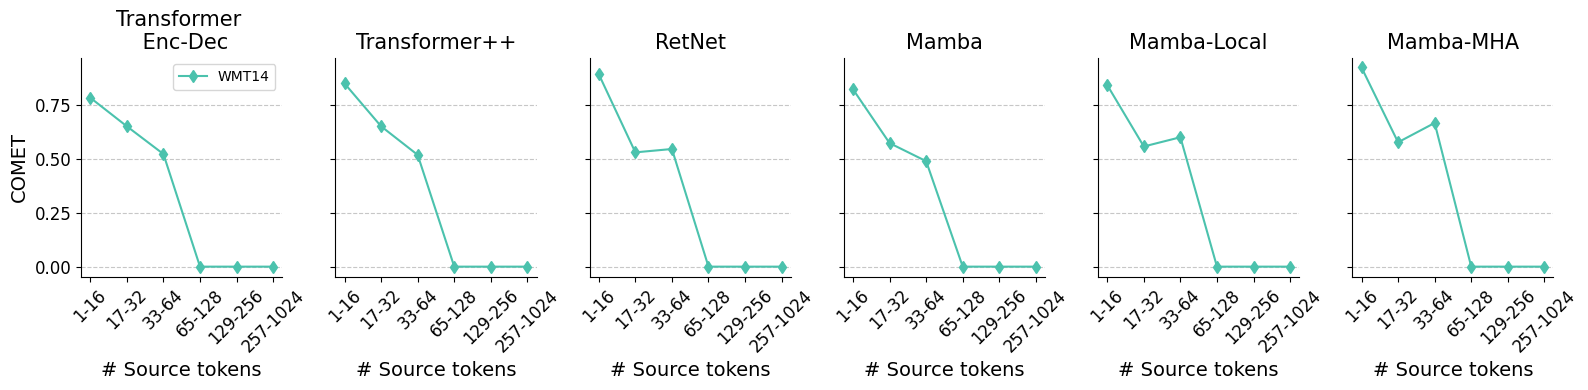

In [15]:
from scripts.ar import *

name_map = {
    "transformer_encdec": "Transformer \n Encoder-Decoder",
    "llama": "Transformer++",
    "retnet": "RetNet",
    "mamba": "Mamba",
    "mamba_mha": "Mamba-MHA",
    "mamba_mistral": "Mamba-Local",
    "mamba_encdec": "Mamba \n Encoder-Decoder",
}


def get_comet_scores_by_length(gen_outputs, ds, source, target):
    # Dictionary to store the accumulated COMET scores and counts for each token length
    comet_scores = []
    tokenizer = ds.get_tokenizer()

    for sample_idx in range(len(ds.dataset)):
        src = (
            ds.dataset["test"][sample_idx]["translation"][source]
        )
        # ref = ds.dataset["test"][sample_idx]["translation"][target]
        comet = gen_outputs[sample_idx][1][4]

        # Tokenize the source sentence to get the number of tokens
        n_tokens = len(tokenizer(src)["input_ids"])

        comet_scores.append((comet, n_tokens))

    return comet_scores


source, target = "de", "en"
datasets = ["wmt14", ]  
# datasets = ["wmt23-6M", "wmt23-5concat"]
models = ["transformer_encdec", "llama", "retnet", "mamba", "mamba_mistral","mamba_mha", "mamba_encdec"] 
# models = ["mamba", "mamba_encdec"]

# Prepare data for all models and datasets for both BLEU and COMET metrics
all_data_bleu = {}
all_data_comet = {}

for dataset in datasets:
    ds = build_dataset(dataset, source, target, is_encoder_decoder=False)
    outputs = [
        get_gen_outputs(
            f"mt/res/{dataset}/{dataset}-{source}-{target}-{model}.json", 
        )
        for model in models
    ]

    # bleu_scores = [
    #    get_bleu_scores_by_length(output, ds, source, target) for output in outputs
    # ]
    comet_scores = [
        get_comet_scores_by_length(output, ds, source, target) for output in outputs
    ]
    # all_data_bleu[dataset] = bleu_scores
    all_data_comet[dataset] = comet_scores

# Extract model names assuming model instances have an attribute `model_name`

model_names = [
    name_map[model] if model in name_map else model
    for model in models
]

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 15

# sns.set_palette("colorblind")
# colors = sns.color_palette("colorblind", n_colors=3).as_hex()
colors = sns.color_palette("mako", n_colors=3).as_hex()[::-1]
# colors = sns.color_palette("rocket", n_colors=3).as_hex()[::-1]
# colors = sns.color_palette("ch:start=.7,rot=-.3", n_colors=3).as_hex()


def plot_comet_lens(datasets, all_data, model_names, source, target):
    global colors
    bins = [1, 16, 32, 64, 128, 256]
    bucket_labels = [f"{int(bins[i-1])+1}-{int(bins[i])}" for i in range(1, len(bins))]

    ncols = 3  # Max number of columns
    fig, axes = plt.subplots(1, 7, figsize=(16, 4), sharey=True)
    axes = np.array(axes).reshape(-1)  # Flatten the axes array for easy indexing
    markers = ["d", "s", "o"]

    # Vertical lines positions for each dataset
    # vertical_lines = [58.4, 171.3, 312.4]

    for i, (ax, model_name) in enumerate(zip(axes, model_names)):
        for dataset, comet_scores in all_data.items():
            model_data = comet_scores[i]
            binned_accuracies = [[] for _ in range(len(bins) - 1)]
            binned_counts = [0] * (
                len(bins) - 1
            )  # List to store the count of samples in each bin

            for accuracy, count in model_data:
                bucket_index = np.digitize(count, bins) - 1
                if bucket_index < len(binned_accuracies):
                    binned_accuracies[bucket_index].append(accuracy)
                    binned_counts[bucket_index] += 1  # Increment the count for the bin

            mean_accuracies = [
                np.mean(bucket) if bucket else 0 for bucket in binned_accuracies
            ]

            dataset_map = {
                "6M": "WMT23-6M",
                "5concat": "WMT23-CAT-5",
                "10concat": "WMT23-CAT-10",
                "wmt14": "WMT14",
            }
            ax.plot(
                bucket_labels,
                mean_accuracies,
                label=f"{dataset_map[dataset]}",
                color=colors[datasets.index(dataset)],
                marker=markers[datasets.index(dataset)],
            )

            # Add vertical dashed lines
            # for vi, line_pos in enumerate(vertical_lines):
            #     if line_pos <= bins[-1]:
            #         ax.axvline(x=np.digitize(line_pos, bins) - 1, color=colors[vi], linestyle='--', linewidth=1.0)

        ax.set_title(model_name, fontsize=LARGE_SIZE)
        ax.set_xlabel("# Source tokens", fontsize=MEDIUM_SIZE)
        if i == 0:  # Set y-label only on the first column
            ax.set_ylabel("COMET", fontsize=MEDIUM_SIZE)
            ax.legend(fontsize=SMALL_SIZE - 2)
        ax.tick_params(axis="x", rotation=45, labelsize=SMALL_SIZE)
        ax.tick_params(axis="y", labelsize=SMALL_SIZE)
        ax.grid(axis="y", linestyle="--", alpha=0.7)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        # Set the number of y-ticks
        num_yticks = 5
        ax.yaxis.set_major_locator(plt.MaxNLocator(num_yticks))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Set y-axis ticks to 2 decimal places

    print([len(acc) for acc in binned_accuracies])

    plt.tight_layout()
    filename = f"{source}{target}_comet_len_sensivity.pdf"
    print("Saving to:", filename)
    plt.savefig(filename, format="pdf", bbox_inches="tight", dpi=300)

    plt.show()


model_names = [
    "Transformer \n Enc-Dec",
    "Transformer++",
    "RetNet",
    "Mamba",
    "Mamba-Local",
    "Mamba-MHA",
    "Mamba \n Enc-Dec",
]

plot_comet_lens(datasets, all_data_comet, model_names, source, target)

In [11]:
all_data_comet

{'wmt14': [[(0.78515625, 9), (0.5234375, 43), (0.65234375, 16)],
  [(0.8515625, 9), (0.51953125, 43), (0.65234375, 16)],
  [(0.82421875, 9), (0.490234375, 43), (0.57421875, 16)],
  [(0.92578125, 9), (0.66796875, 43), (0.578125, 16)],
  [(0.88671875, 9), (0.5703125, 43), (0.59375, 16)]]}

/tmp/ipykernel_1540248/2773359693.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("winter", 3)  # 'n' is the number of unique colors needed


[219, 121, 73, 59, 40, 18, 19]


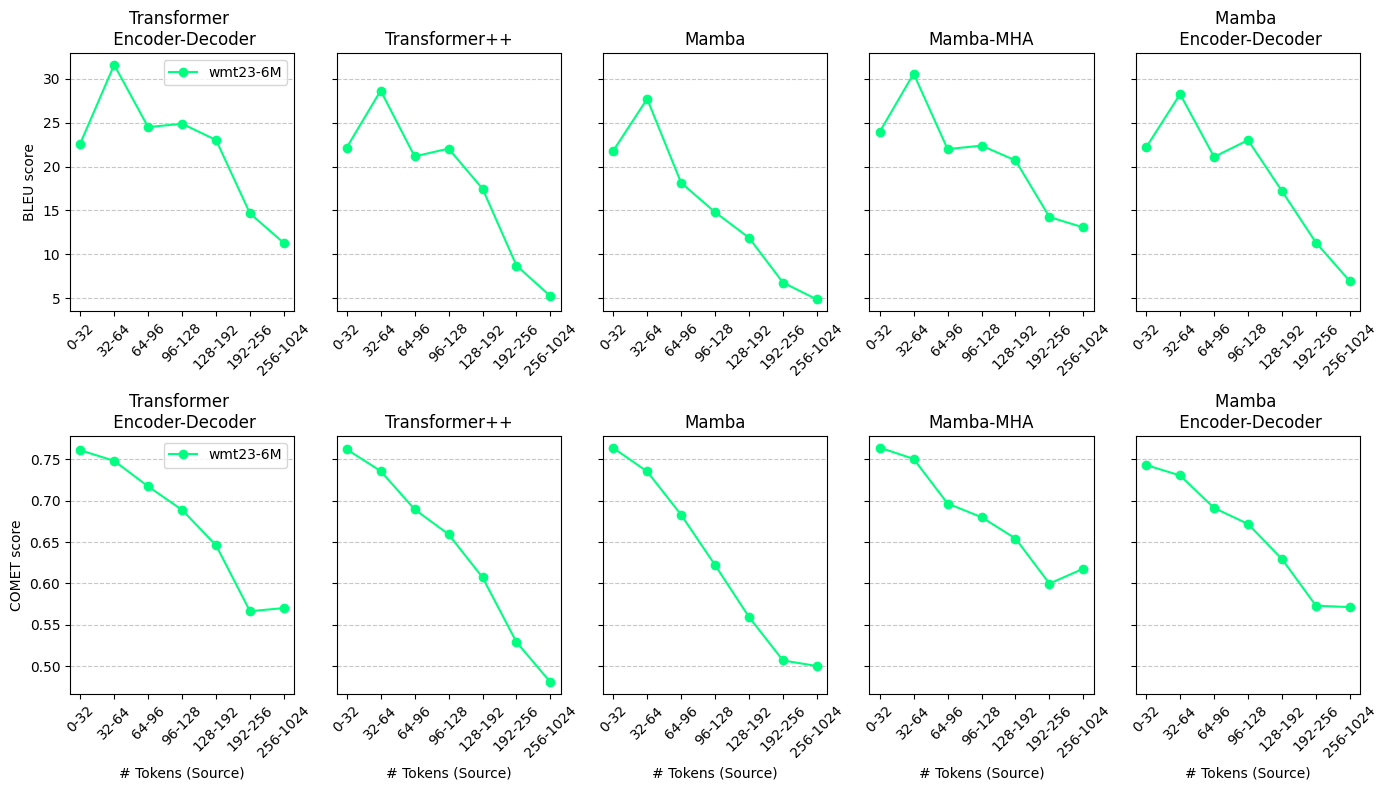

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math


def plot_score_comparison(datasets, data_bleu, data_comet, model_names, source, target):
    n = len(model_names)
    cmap = plt.cm.get_cmap("winter", 3)  # 'n' is the number of unique colors needed
    colors = [to_hex(cmap(i)) for i in range(2, -1, -1)]

    bins = [0, 32, 64, 96, 128, 192, 256, 1024]
    # bins = [1, 14, 28, 44, 78, 122, 180, 969]
    bucket_labels = [f"{int(bins[i-1])}-{int(bins[i])}" for i in range(1, len(bins))]

    ncols = 5  # Max number of columns
    nrows = 2
    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8), sharey="row",)
    axes = np.array(axes).reshape(nrows, ncols)  # Reshape for easy indexing

    # Handling different data types in loop
    all_data = [data_bleu, data_comet]
    score_labels = ["BLEU score", "COMET score"]

    for row, (data, score_label) in enumerate(zip(all_data, score_labels)):
        for i, (ax, model_name) in enumerate(zip(axes[row], model_names)):
            for dataset, scores in data.items():
                model_data = scores[i]
                binned_accuracies = [[] for _ in range(len(bins) - 1)]
                for accuracy, count in model_data:
                    bucket_index = np.digitize(count, bins) - 1
                    if bucket_index < len(binned_accuracies):
                        binned_accuracies[bucket_index].append(accuracy)
                mean_accuracies = [
                    np.mean(bucket) if bucket else 0 for bucket in binned_accuracies
                ]
                ax.plot(
                    bucket_labels,
                    mean_accuracies,
                    label=f"{dataset}",
                    color=colors[datasets.index(dataset)],
                    marker="o",
                )
            ax.set_title(model_name)
            if row == 1:
                ax.set_xlabel("# Tokens (Source)")
            if i == 0:  # Set y-label only on the first column of each row
                ax.set_ylabel(score_label)
            ax.tick_params(axis="x", rotation=45)
            ax.grid(axis="y", linestyle="--", alpha=0.7)
            if i  == 0:
                ax.legend()

    print([len(acc) for acc in binned_accuracies])
    plt.tight_layout()
    plt.savefig(f"plots/{source}-{target}-comparison.pdf")
    plt.show()


# Example usage
plot_score_comparison(
    datasets, all_data_bleu, all_data_comet, model_names, source, target
)

In [48]:
from comet import download_model, load_from_checkpoint

model_path = download_model("Unbabel/XCOMET-XL", "data/hf-cache")
model = load_from_checkpoint(model_path)
data = [
    {
        "src": "Boris Johnson teeters on edge of favour with Tory MPs",
        "mt": "Boris Johnson ist bei Tory-Abgeordneten völlig in der Gunst",
        "ref": "Boris Johnsons Beliebtheit bei Tory-MPs steht auf der Kippe",
    }
]
model_output = model.predict(data, batch_size=8, gpus=1)
# Segment-level scores
print(model_output.scores)

# System-level score
print(model_output.system_score)

# Score explanation (error spans)
print(model_output.metadata.error_spans)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
def map_format(sample):

    return {
        "src": sample[0],  # Assuming sample[0] is source text
        "mt": sample[1],  # Assuming sample[1] is machine translation output
        "ref": sample[2],  # Assuming sample[2] is reference translation
    }


def get_error_spans(data, model, batch_size=64):
    ds_size = len(data)

    spans = []

    for start in range(0, ds_size, batch_size):
        end = min(start + batch_size, ds_size)
        batch = data[start:end]

        mapped_data = [map_format(sample[1]) for sample in batch]

        batch_output = model.predict(mapped_data, batch_size=len(mapped_data), gpus=1, progress_bar=False)
        spans.append(batch_output)

        print(start, end)





    return spans


out = [get_error_spans(outputs[model_idx], model, batch_size=64) for model_idx in range(len(models))]

In [1]:
import json

In [3]:
retnet = json.load(open("mt/res/iwslt17/xcomet_retnet.json", "r"))
retnet

{'scores': [0.5027148127555847,
  0.45468905568122864,
  0.8027012348175049,
  0.6410812139511108,
  0.9739817380905151,
  0.9912000298500061,
  0.572654664516449,
  0.9274364709854126,
  0.7537591457366943,
  0.8322328329086304,
  0.9551390409469604,
  0.5264432430267334,
  0.3037305474281311,
  0.7759454846382141,
  0.5845869183540344,
  0.5381351113319397,
  1.0,
  0.800168514251709,
  0.7250534296035767,
  0.7299613952636719,
  0.8415469527244568,
  1.0,
  0.8936365842819214,
  0.8190978765487671,
  0.4552387297153473,
  1.0,
  0.9723995923995972,
  0.4937693178653717,
  0.5196810364723206,
  0.7211229801177979,
  0.7643935680389404,
  0.16663649678230286,
  1.0,
  1.0,
  0.38852834701538086,
  0.9243180155754089,
  0.9562522768974304,
  0.6919525265693665,
  0.9817318916320801,
  0.9815367460250854,
  0.8228009939193726,
  0.8925392627716064,
  0.7495377063751221,
  0.8460098505020142,
  0.8682477474212646,
  0.884929895401001,
  0.687292218208313,
  0.630047082901001,
  1.0,
  1.

In [6]:
retnet['metadata']['error_spans']

AttributeError: 'dict' object has no attribute 'metadata'

In [ ]:
import nltk
from nltk import ne_chunk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

nltk.download("punkt")
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /home/hugo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/hugo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hugo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from mt.ds import build_dataset

source = "de"
target = "en"
ds = build_dataset("iwslt17", source, target, is_encoder_decoder=False)
ds.get_tokenizer()

PreTrainedTokenizerFast(name_or_path='data/mt/tokenizers/iwslt17-en-de', vocab_size=32000, model_max_length=4096, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<BOS>', 'eos_token': '<EOS>', 'sep_token': '<SEP>', 'pad_token': '<PAD>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<PAD>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<EOS>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<SEP>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<BOS>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

# plots

1. Count sample occurrences of NE
2. Count failures to decode NE in test
3. Plot x/y sample-occurrences/prob decode
4. Plot prob-decode vs sample len

In [ ]:
from nltk import Tree


def extract_named_entities(tree):
    named_entities = []

    for subtree in tree:
        if type(subtree) == Tree and subtree.label() in [
            "PERSON",
            "ORGANIZATION",
            "GPE",
        ]:
            entity = " ".join(word for word, tag in subtree.leaves())
            named_entities.append(entity)
        elif type(subtree) == tuple and subtree[1] == "NNP":
            named_entities.append(subtree[0])

    return named_entities


from tqdm.auto import tqdm

pipe = lambda x: extract_named_entities(ne_chunk(pos_tag(word_tokenize(x))))

ne_counter = {}

In [ ]:


for i, sample in enumerate(tqdm(ds.dataset["train"])):
    source_text = sample["translation"][source]
    target_text = sample["translation"][target]

    target_ne = pipe(target_text)
    # sample freq
    used = set(target_ne)
    for ne in used:
        if ne not in source_text:
            continue
        if ne not in ne_counter:
            ne_counter[ne] = 0
        ne_counter[ne] += 1

  0%|          | 0/206112 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
with (open("/home/hugo/retnet-mt/mt/res/wmt16/ro-en-ne-counter.json", "r")) as f:
    f.readlines()

In [ ]:
import json
ne_counter = json.load(
    open("mt/res/iwslt17/de-en_ne_counter.json", "r")
)
# json.dump(ne_counter, open("de-en_ne_counter.json", "w"))

In [ ]:
import string
from tqdm.auto import tqdm

test_named_entities = []
for i, sample in enumerate(tqdm(ds.dataset["test"])):
    source_text = sample["translation"][source]
    target_text = sample["translation"][target]

    target_ne = pipe(target_text)
    target_ne = [ne for ne in target_ne if ne in source_text]
    # sample freq
    used = set(target_ne)
    test_named_entities.append((i, tuple(ne for ne in used)))

  0%|          | 0/8079 [00:00<?, ?it/s]

In [ ]:
import json

# (tsrcs, tpreds, tlabels, bleu_scores, res["scores"])
# llama = json.load(open("mt/res/iwslt17/de-en-llama.json", "r"))
retnet = json.load(open("mt/res/iwslt17/iwslt17-de-en-retnet.json", "r"))
mamba = json.load(open("mt/res/iwslt17/iwslt17-de-en-mamba.json", "r"))
transformer_encdec = json.load(
    open("mt/res/iwslt17/iwslt17-de-en-transformer_encdec.json", "r")
)

# save = []
# for entry in llama:
#     x = [sample for sample in zip(*entry)]
#     save += x

# llama = [(i, sample) for i, sample in enumerate(save)]

save = []
for entry in retnet:
    x = [sample for sample in zip(*entry)]
    save += x

retnet = [(i, sample) for i, sample in enumerate(save)]

save = []
for entry in mamba:
    x = [sample for sample in zip(*entry)]
    save += x

mamba = [(i, sample) for i, sample in enumerate(save)]


save = []
for entry in transformer_encdec:
    x = [sample for sample in zip(*entry)]
    save += x

transformer_encdec = [(i, sample) for i, sample in enumerate(save)]

In [ ]:
transformer_encdec[:10]

[(0,
  (' Vor einigen Jahren, hier bei TED, stellte Peter Skillman einen Design-Wettbewerb namens "Die Marshmallow-Herausforderung" vor.',
   ' A few years ago here at TED, Peter Scillman, a design competition called "The City Council Glacier."',
   ' Several years ago here at TED, Peter Skillman  introduced a design challenge  called the marshmallow challenge.',
   30.603689509300906,
   0.6328125)),
 (1,
  (' Die Idee ist ziemlich einfach. Vierer-teams müssen die größtmögliche freistehende Struktur mit 20 Spaghetti, ca. 1m Klebeband, ca. 1m Faden und einem Marshmallow bauen.',
   ' The idea is quite simple. Four teams must have the biggest possible set of 20 spaghetti sauces, about 1.3, about one meter and one surface.',
   " And the idea's pretty simple:  Teams of four have to build the tallest free-standing structure  out of 20 sticks of spaghetti,  one yard of tape, one yard of string  and a marshmallow.",
   3.163878715820456,
   0.54296875)),
 (2,
  (' Der Marshmallow muss oben 

In [ ]:
ds.dataset["test"][:10]

{'translation': [{'de': 'Vor einigen Jahren, hier bei TED, stellte Peter Skillman einen Design-Wettbewerb namens "Die Marshmallow-Herausforderung" vor.',
   'en': 'Several years ago here at TED, Peter Skillman  introduced a design challenge  called the marshmallow challenge.'},
  {'de': 'Die Idee ist ziemlich einfach. Vierer-teams müssen die größtmögliche freistehende Struktur mit 20 Spaghetti, ca. 1m Klebeband, ca. 1m Faden und einem Marshmallow bauen.',
   'en': "And the idea's pretty simple:  Teams of four have to build the tallest free-standing structure  out of 20 sticks of spaghetti,  one yard of tape, one yard of string  and a marshmallow."},
  {'de': 'Der Marshmallow muss oben drauf sein.',
   'en': 'The marshmallow has to be on top.'},
  {'de': 'Und, obwohl es wirklich einfach scheint, ist es tatsächlich richtig schwer, weil es Leute drängt sehr schnell zusammenzuarbeiten.',
   'en': "And, though it seems really simple, it's actually pretty hard  because it forces people  to c

In [ ]:
acc = {}

for entry in test_named_entities:

    sample_idx = entry[0]

    src = ds.dataset["test"][sample_idx]["translation"]["de"]
    ref = ds.dataset["test"][sample_idx]["translation"]["en"]

    # src = retnet[sample_idx][1][0]
    # ref = retnet[sample_idx][1][2]

    # llama_bleu = llama[sample_idx][1][3] #
    # llama_comet = llama[sample_idx][1][4]
    # llama_pred = llama[sample_idx][1][1]

    retnet_bleu = retnet[sample_idx][1][3]
    retnet_comet = retnet[sample_idx][1][4]
    retnet_pred = retnet[sample_idx][1][1]

    mamba_bleu = mamba[sample_idx][1][3]
    mamba_comet = mamba[sample_idx][1][4]
    mamba_pred = mamba[sample_idx][1][1]

    transformer_encdec_bleu = transformer_encdec[sample_idx][1][3]
    transformer_encdec_comet = transformer_encdec[sample_idx][1][4]
    transformer_encdec_pred = transformer_encdec[sample_idx][1][1]

    if len(entry[1]) > 0:

        for ne in entry[1]:
            # Preparing updates based on current predictions
            current_acc = (
                ne in transformer_encdec_pred,
                ne in retnet_pred,
                ne in mamba_pred,
            )

            if ne not in acc:
                acc[ne] = (1, current_acc)  # Initial count and accuracy tuple
            else:
                prev_count, prev_acc = acc[ne]
                # Updating the count
                updated_count = prev_count + 1

                # Updating accuracy values: Calculating new mean accuracy
                updated_acc = tuple(
                    (prev_acc[i] * prev_count + current_acc[i]) / updated_count
                    for i in range(len(prev_acc))
                )

                acc[ne] = (updated_count, updated_acc)

        # print("counts: ", [f"{ne}, {ne_counter.get(ne, 0)}" for ne in entry[1]])
        # print(llama_comet, retnet_comet, mamba_comet)
        print(src)
        print(ref)
        # print(llama_pred)
        # print(retnet_pred)
        print(mamba_pred)
        print(transformer_encdec_pred)
        print()


gather_accs = ([], [], [])

for k, v in acc.items():

    count = ne_counter.get(k, 0)

    for i in range(len(gather_accs)):
        gather_accs[i].append((v[1][i], count))

Vor einigen Jahren, hier bei TED, stellte Peter Skillman einen Design-Wettbewerb namens "Die Marshmallow-Herausforderung" vor.
Several years ago here at TED, Peter Skillman  introduced a design challenge  called the marshmallow challenge.
 A few years ago at TED, Peter Skillman founded a design competition called the Mars bomb competition.
 A couple of years ago at TED, Peter Skillman introduced a design competition called "The Mars Mermaid."

Seitdem habe ich ungefähr 70 Workshops weltweit durchgeführt, mit Studenten, Entwicklern und Architekten, sogar mit CTOs der Fortune-50-Unternehmen und da ist etwas an dieser Aufgabe, was tiefe Eindrücke in die Natur der Zusammenarbeit ermöglicht und ich möchte einige davon mit Ihnen teilen.
And since then, I've conducted  about 70 design workshops across the world  with students and designers and architects,  even the CTOs of the Fortune 50,  and there's something about this exercise  that reveals very deep lessons  about the nature of collabora

In [ ]:
transformer_encdec[5]

(5,
 (' Ich bereitete mich für die Aufnahmeprüfung an der Universität vor.',
  " I was preparing for the University's recording.",
  ' I started studying for the university entrance exam.',
  11.59119922599073,
  0.5859375))

In [ ]:
ne_counter

{'Chris': 264,
 'Force': 8,
 'Nashville': 11,
 'Tipper': 6,
 'Ford': 28,
 'Taurus': 1,
 'Lebanon': 1,
 'I-40': 1,
 'Tennessee': 21,
 'Shoney': 3,
 'Al Gore': 41,
 'Lagos': 27,
 'Nigeria': 124,
 'Washington': 124,
 'Monterey': 33,
 'Jay Leno': 1,
 'David Letterman': 2,
 'Bill Clinton': 20,
 'Al': 25,
 'TED': 526,
 'Anderson': 100,
 'John Doerr': 3,
 'Vinod': 1,
 'Participant Productions': 3,
 'CO2': 130,
 'Majora': 1,
 'Invest': 7,
 'Larry Lessig': 1,
 'Bill Joy': 4,
 'Haiti': 80,
 'Fossil': 3,
 'MIT': 119,
 'Peace Corps': 2,
 'Ghana': 81,
 'Charbon': 1,
 'Ecole': 1,
 'Instron': 1,
 'Nick': 26,
 'Robert Wright': 4,
 'Afghanistan': 210,
 'Internet': 732,
 'AIDS': 134,
 'HIV': 232,
 'Smith': 12,
 'Amy': 28,
 'Dewey': 7,
 'September': 94,
 'Johns Hopkins': 5,
 'Lockhart': 2,
 'Clare': 1,
 'Oxford': 59,
 'Thomas Kuhn': 2,
 'Ashraf': 2,
 'Ghani': 1,
 'Afghan': 13,
 'Clare Lockhart': 1,
 'AG': 35,
 'China': 626,
 'US': 19,
 'Houston': 13,
 'Bush': 40,
 'NASA': 107,
 'Boeing': 11,
 'Lockheed':

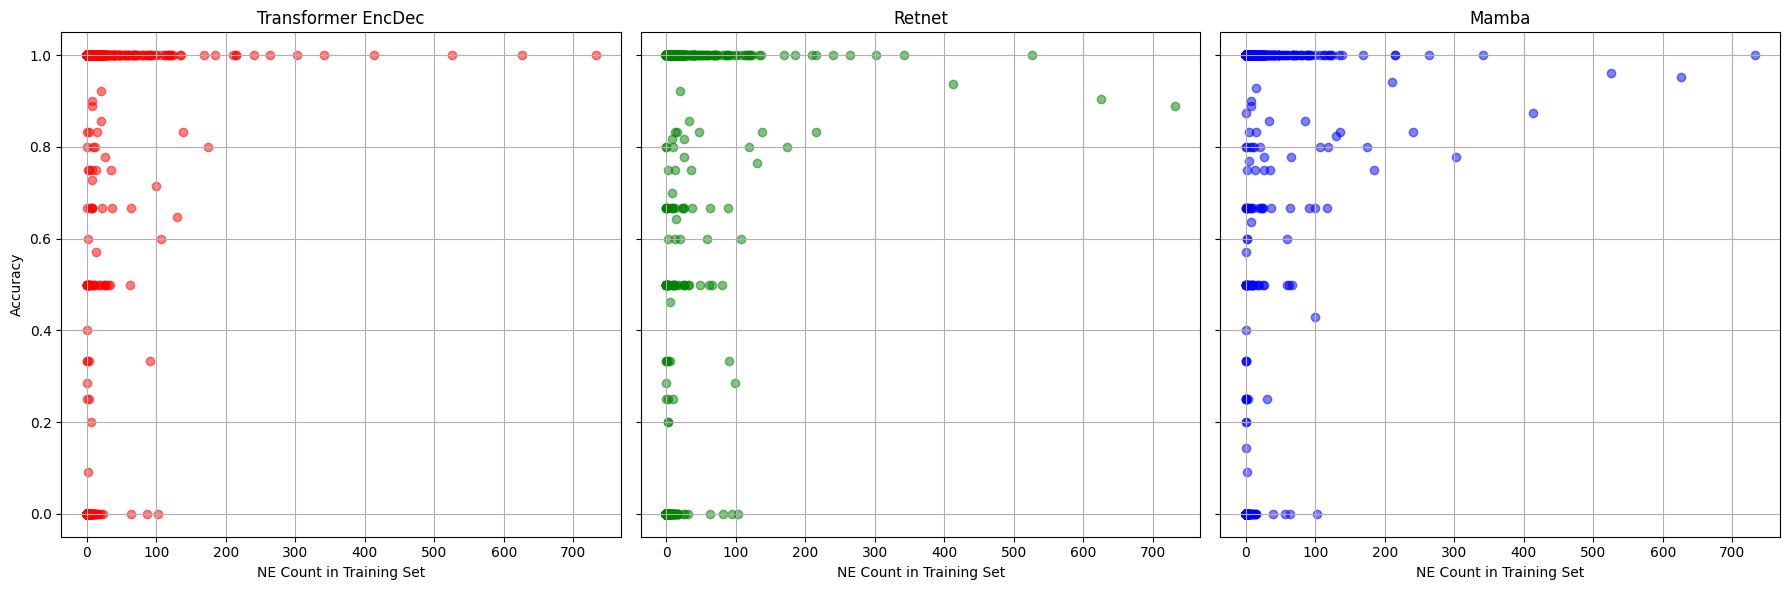

In [ ]:
import matplotlib.pyplot as plt

# Assuming gather_accs is populated as in your previous code

# Unpacking the data for clarity
(
    transformer_encdec_data,
    retnet_data,
    mamba_data,
) = gather_accs

# Setting up the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Defining titles for each subplot
titles = ["Transformer EncDec",  "Retnet", "Mamba"]

colors = ["red", "green", "blue"]
i = 0
# Looping through each set of data to create subplots
for ax, data, title in zip(
    axes,
    [
        transformer_encdec_data,
        retnet_data,
        mamba_data,
    ],
    titles,
):
    # Unpacking accuracy and NE count from the data
    y, x = zip(*data)  # x is accuracy, y is NE count in the training set
    ax.scatter(x, y, alpha=0.5, color=colors[i])  # Plotting the scatter plot
    i += 1
    # Setting titles, labels, and grid for each subplot
    ax.set_title(title)
    ax.set_xlabel("NE Count in Training Set")
    ax.grid(True)

# This ensures the y-axis label is only set once for all subplots
axes[0].set_ylabel("Accuracy")

plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()

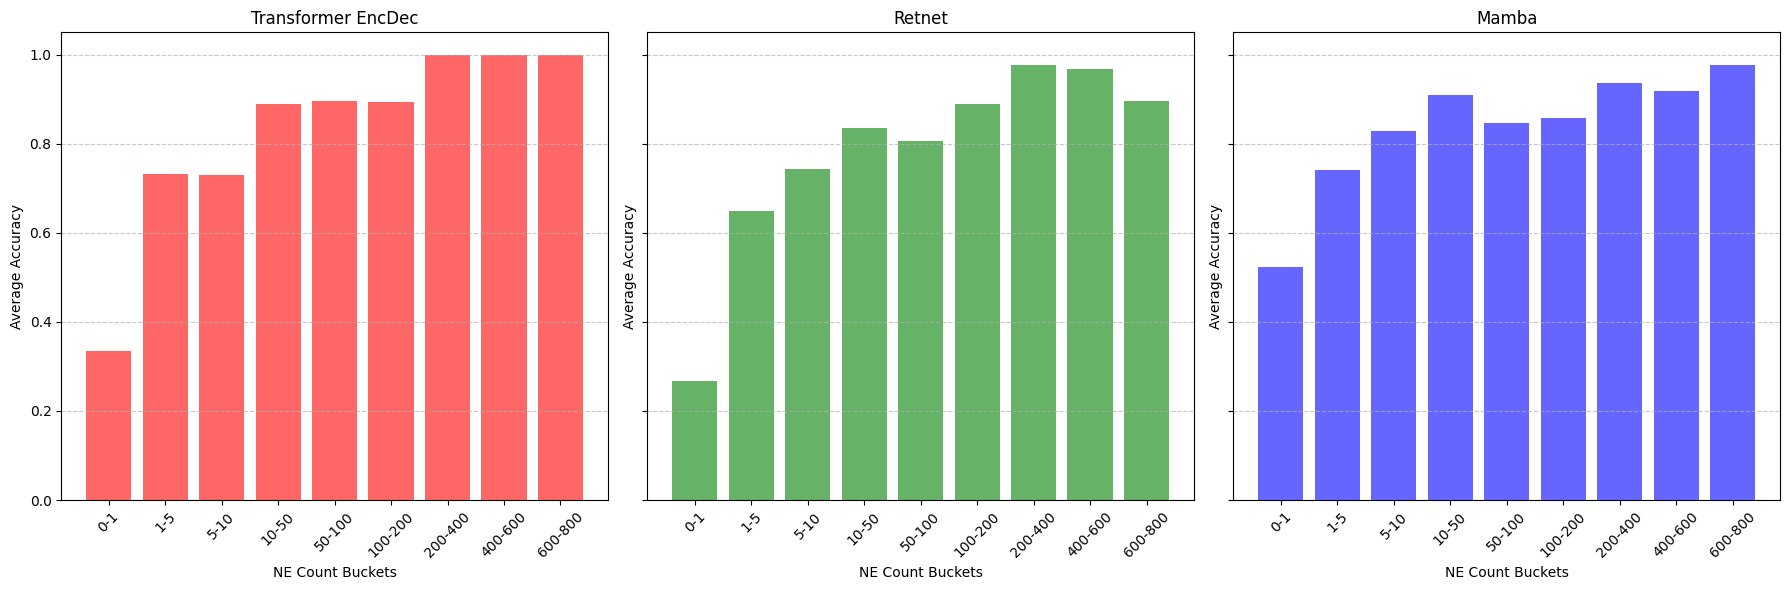

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming gather_accs is a tuple of 3 lists, each containing tuples of (accuracy, NE count)
# We will create a function to process this data and plot it.
model_names = [
    "Transformer EncDec" ,
    "Retnet",
    "Mamba",
]

max_count = max(max(count for _, count in model_data) for model_data in gather_accs)

# Generate buckets
bins = np.concatenate((np.array([0]), np.geomspace(1, max_count + 1, 15)))

bins = [0, 1, 5, 10, 50, 100, 200, 400, 600, 800]
# bins = [0, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
bucket_labels = [f"{int(bins[i-1])}-{int(bins[i])}" for i in range(1, len(bins))]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ["red", "green", "blue"]
i = 0

for ax, model_data, model_name in zip(axes, gather_accs, model_names):
    # Bin the data
    binned_accuracies = [[] for _ in range(1, len(bins))]
    for accuracy, count in model_data:
        # Find the appropriate bucket for the current NE count
        bucket_index = np.digitize(count, bins) - 1
        binned_accuracies[bucket_index].append(accuracy)

    # Calculate mean accuracy for each bucket

    mean_accuracies = [np.mean(bucket) for bucket in binned_accuracies]

    # Plot
    ax.bar(bucket_labels, mean_accuracies, alpha=0.6, color=colors[i])
    ax.set_title(model_name)
    ax.set_xlabel("NE Count Buckets")
    ax.set_ylabel("Average Accuracy")

    # Improving readability
    ax.tick_params(axis="x", rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    i += 1

plt.tight_layout()
plt.show()

In [ ]:
[len(bucket) for bucket in binned_accuracies], max_count


([402, 206, 89, 171, 36, 20, 7, 2, 2], 732)

In [ ]:
acc = {}
tokenizer = ds.get_tokenizer()
for entry in test_named_entities:

    entry_idx = entry[0]

    src = ds.dataset["test"][entry_idx]["translation"]["de"]
    ref = ds.dataset["test"][entry_idx]["translation"]["en"]

    # llama_pred = llama[entry_idx][1][1]
    # llama_bleu = llama[entry_idx][1][3]
    # llama_comet = llama[entry_idx][1][4]

    retnet_pred = retnet[entry_idx][1][1]
    retnet_bleu = retnet[entry_idx][1][3]
    retnet_comet = retnet[entry_idx][1][4]

    mamba_pred = mamba[entry_idx][1][1]
    mamba_bleu = mamba[entry_idx][1][3]
    mamba_comet = mamba[entry_idx][1][4]

    transformer_encdec_pred = transformer_encdec[entry_idx][1][1]
    transformer_encdec_bleu = transformer_encdec[entry_idx][1][3]
    transformer_encdec_comet = transformer_encdec[entry_idx][1][4]

    if len(entry[1]) > 0:
        n_tokens = len(tokenizer(src)["input_ids"])

        for ne in entry[1]:
            # Preparing updates based on current predictions
            current_acc = (ne in transformer_encdec_pred, ne in retnet_pred, ne in mamba_pred)

            if n_tokens not in acc:
                acc[n_tokens] = (1, current_acc)  # Initial count and accuracy tuple
            else:
                prev_count, prev_acc = acc[n_tokens]
                # Updating the count
                updated_count = prev_count + 1

                # Updating accuracy values: Calculating new mean accuracy
                updated_acc = tuple(
                    (prev_acc[i] * prev_count + current_acc[i]) / updated_count
                    for i in range(len(prev_acc))
                )

                acc[n_tokens] = (updated_count, updated_acc)

        print("counts: ", [f"{ne}, {ne_counter.get(ne, 0)}" for ne in entry[1]])
        # print(llama_comet, retnet_comet, mamba_comet)
        print(src)
        print(ref)
    
        # print(retnet_pred)
        print(mamba_pred)
        # print()
    

counts:  ['TED, 526', 'Peter Skillman, 0']
Vor einigen Jahren, hier bei TED, stellte Peter Skillman einen Design-Wettbewerb namens "Die Marshmallow-Herausforderung" vor.
Several years ago here at TED, Peter Skillman  introduced a design challenge  called the marshmallow challenge.
 A few years ago at TED, Peter Skillman founded a design competition called the Mars bomb competition.
counts:  ['CTOs, 0', 'Fortune, 10']
Seitdem habe ich ungefähr 70 Workshops weltweit durchgeführt, mit Studenten, Entwicklern und Architekten, sogar mit CTOs der Fortune-50-Unternehmen und da ist etwas an dieser Aufgabe, was tiefe Eindrücke in die Natur der Zusammenarbeit ermöglicht und ich möchte einige davon mit Ihnen teilen.
And since then, I've conducted  about 70 design workshops across the world  with students and designers and architects,  even the CTOs of the Fortune 50,  and there's something about this exercise  that reveals very deep lessons  about the nature of collaboration,  and I'd like to shar

In [ ]:
acc

{26: (2, (0.0, 0.0, 0.0, 0.0))}

In [ ]:
gather_accs = ([], [], [])

for k, v in acc.items():
    for i in range(len(gather_accs)):
        gather_accs[i].append((v[1][i], k))

gather_accs

([(0.7872340425531915, 32),
  (0.5714285714285714, 57),
  (0.649122807017544, 23),
  (0.7317073170731706, 13),
  (0.717948717948718, 27),
  (0.5, 9),
  (0.6585365853658538, 24),
  (0.6153846153846154, 19),
  (0.5652173913043478, 34),
  (0.576923076923077, 44),
  (0.7222222222222222, 11),
  (0.8571428571428571, 7),
  (0.7307692307692307, 37),
  (0.8, 8),
  (0.6170212765957447, 22),
  (0.7446808510638298, 31),
  (0.5645161290322579, 16),
  (0.5957446808510638, 12),
  (0.9285714285714286, 53),
  (0.625, 51),
  (0.6862745098039216, 18),
  (0.7777777777777778, 33),
  (0.5, 83),
  (0.5, 72),
  (0.7435897435897436, 30),
  (0.8666666666666667, 68),
  (0.71875, 36),
  (0.6153846153846154, 46),
  (0.25, 59),
  (0.6538461538461539, 45),
  (0.7777777777777778, 20),
  (0.6153846153846154, 55),
  (1.0, 54),
  (0.7916666666666666, 10),
  (0.8947368421052632, 38),
  (0.9090909090909091, 6),
  (0.5925925925925926, 25),
  (0.7567567567567567, 17),
  (0.6190476190476191, 49),
  (0.7, 52),
  (0.6153846153

In [ ]:
min_count = min(min(count for _, count in model_data) for model_data in gather_accs)
max_count = max(max(count for _, count in model_data) for model_data in gather_accs)

min_count, max_count

(6, 224)

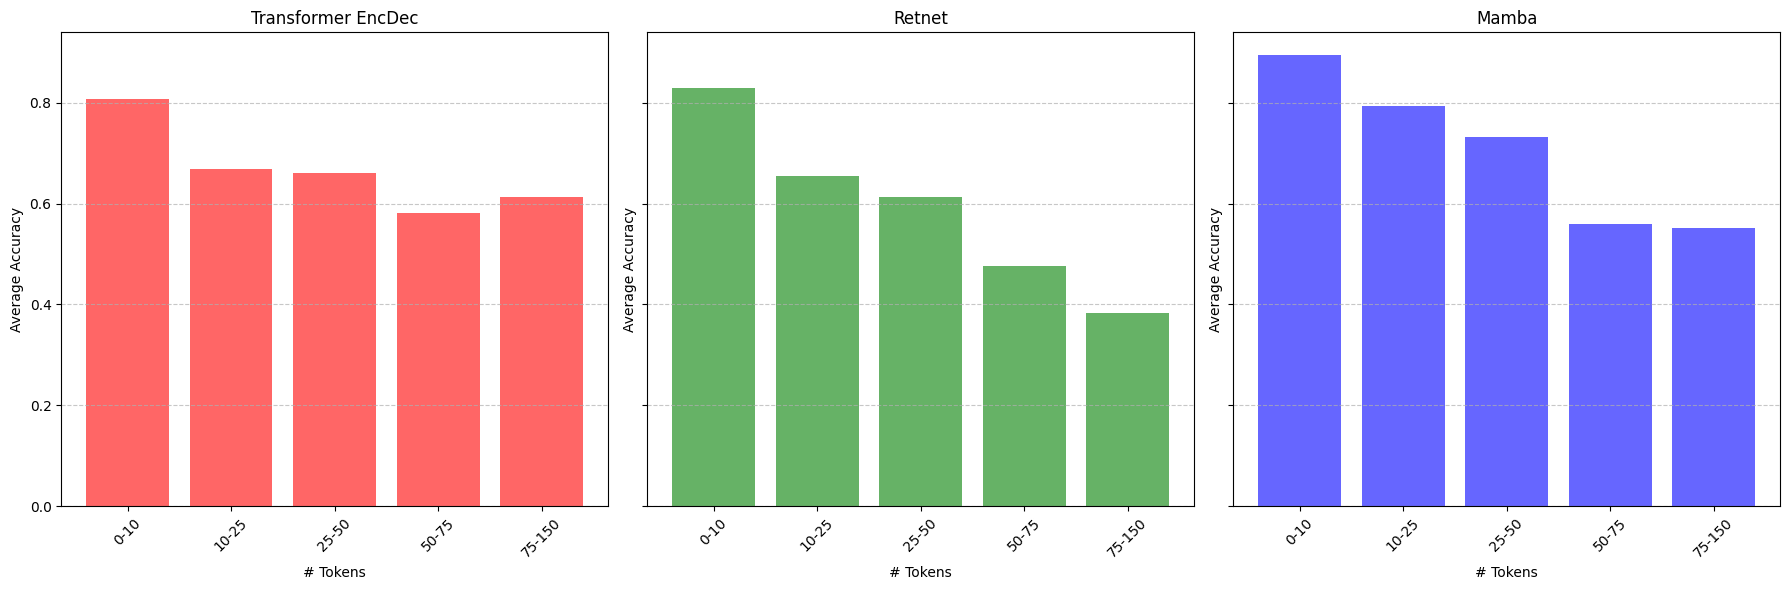

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming gather_accs is a tuple of 3 lists, each containing tuples of (accuracy, NE count)
# We will create a function to process this data and plot it.
model_names = ["Transformer EncDec", "Retnet", "Mamba"]

# Generate buckets
# bins = [0, 25, 50, 75, 100, 200, 300] # ro en
bins = [0, 10, 25, 50, 75, 150] # de en
bucket_labels = [f"{int(bins[i-1])}-{int(bins[i])}" for i in range(1, len(bins))]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ["red", "green", "blue",]
i = 0

for ax, model_data, model_name in zip(axes, gather_accs, model_names):
    # Bin the data
    binned_accuracies = [[] for _ in range(len(bins) - 1)]
    for accuracy, count in model_data:
        # Find the appropriate bucket for the current NE count
        bucket_index = np.digitize(count, bins) - 1
        binned_accuracies[bucket_index].append(accuracy)

    # Calculate mean accuracy for each bucket

    mean_accuracies = [np.mean(bucket) for bucket in binned_accuracies]

    # Plot
    ax.bar(bucket_labels, mean_accuracies, alpha=0.6, color=colors[i])
    ax.set_title(model_name)
    ax.set_xlabel("# Tokens")
    ax.set_ylabel("Average Accuracy")

    # Improving readability
    ax.tick_params(axis="x", rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    i += 1

plt.tight_layout()
plt.show()

In [ ]:
[len(bucket) for bucket in binned_accuracies]

[7, 15, 25, 24, 20]